# Dataset 2: crime.csv

## Dalam pengerjaan ini, penulis menggunakan distribusi binomial, karena pengujian berbentuk Bernoulli trial (pengujian independen dan dilakukan berulang kali, dan setiap pengujian antara memenuhi syarat atau tidak memenuhi syarat) dan dilakukan tanpa replacement.

## Import library-library yang penting:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Baca file crime.csv, kemudian data dimuat dalam notebook sebagai referensi

In [23]:
data = pd.read_csv('crime.csv', delimiter=',', encoding="cp1252")
data

INCIDENT_NUMBER  OFFENSE_CODE               OFFENSE_CODE_GROUP  \
0           I182080058          2403               Disorderly Conduct   
1           I182080053          3201                    Property Lost   
2           I182080052          2647                            Other   
3           I182080051           413               Aggravated Assault   
4           I182080050          3122                         Aircraft   
5           I182080049          1402                        Vandalism   
6           I182080048          3803  Motor Vehicle Accident Response   
7           I182080047          3301                  Verbal Disputes   
8           I182080045           802                   Simple Assault   
9           I182080044          3410                            Towed   
10          I182080043          3803  Motor Vehicle Accident Response   
11          I182080042           706                       Auto Theft   
12          I182080041          3006               Medical Assistance   
13          I182080040          3115               Investigate Person   
14          I182080039          3006               Medical Assistance   
15          I182080038          3831  Motor Vehicle Accident Response   
16          I182080037          2647                            Other   
17          I182080035          2647                            Other   
18          I182080034          3115               Investigate Person   
19          I182080031          3108             Fire Related Reports   
20          I182080030          3831  Motor Vehicle Accident Response   
21          I182080029           613                          Larceny   
22          I182080028          3114             Investigate Property   
23          I182080027          3301                  Verbal Disputes   
24          I182080027           619                          Larceny   
25          I182080026          2629                       Harassment   
26          I182080025           311                          Robbery   
27          I182080024          1842                   Drug Violation   
28          I182080023          3115               Investigate Person   
29          I182080022          3006               Medical Assistance   
...                ...           ...                              ...   
327790   I110551302-00          3125                  Warrant Arrests   
327791   I110551302-00           623                          Larceny   
327792   I110372326-00           403               Aggravated Assault   
327793   I110372326-00          3125                  Warrant Arrests   
327794   I110261417-00          3125                  Warrant Arrests   
327795   I110261417-00           619                          Larceny   
327796   I110177502-00          3125                  Warrant Arrests   
327797   I110177502-00           802                   Simple Assault   
327798   I110177502-00          3125                  Warrant Arrests   
327799   I100636670-00           629                          Larceny   
327800   I100636670-00          3125                  Warrant Arrests   
327801   I100340225-00          3125                  Warrant Arrests   
327802   I100340225-00           339                          Robbery   
327803   I100222105-02          3125                  Warrant Arrests   
327804   I100033064-00          2907                       Violations   
327805   I100033064-00          2910                       Violations   
327806   I090321958-00          3125                  Warrant Arrests   
327807   I090321958-00          3125                  Warrant Arrests   
327808   I090317057-00           403               Aggravated Assault   
327809   I090317057-00          3125                  Warrant Arrests   
327810   I080542626-00          3125                  Warrant Arrests   
327811   I080542626-00          1848                   Drug Violation   
327812   I080542626-00          1849                   Drug Viola

## Buat visualisasi. Karena data dalam crime.csv tidak numerik, maka hanya dilakukan visualisasi yang dianggap penting dan memungkinkan.

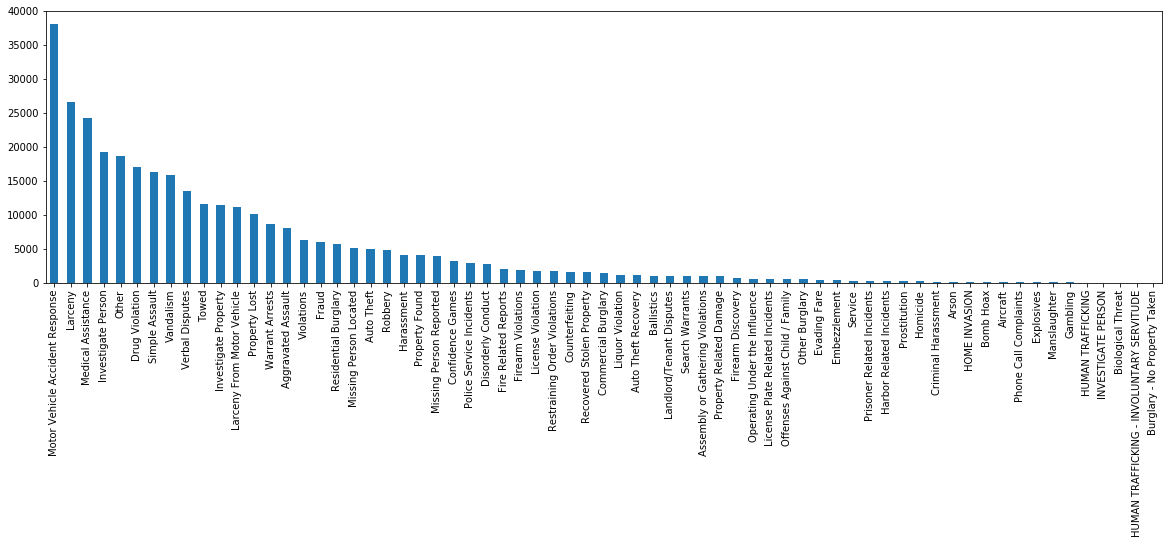

In [24]:
data['OFFENSE_CODE_GROUP'].value_counts().plot(kind='bar', figsize=(20,5))

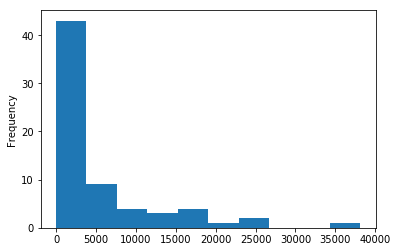

In [25]:
data['OFFENSE_CODE_GROUP'].value_counts().plot(kind='hist')

## Pengerjaan soal a - i.

### Hitung berapa banyak crime yang termasuk homicide

In [95]:
homicideSum = data['OFFENSE_CODE_GROUP'].eq('Homicide').sum()

### Hitung berapa banyak total crime dalam data

In [33]:
allOffences = data['OFFENSE_CODE_GROUP'].count()

### Dengan rumus ekspektansi dari distribusi binomial sebagai berikut:

$ μ = np $

### dengan n merupakan jumlah kejadian (dalam kasus ini: 1000), dan p merupakan kemungkinan kejadian (dalam kasus ini: homicideSum / allOffences), maka ditemukan nilai ekspektasi sebagai berikut:

In [52]:
(homicideSum / allOffences) * 1000 # jawaban 2a - i

0.5033249954243183

## Pengerjaan soal a - ii.

### Hitung berapa banyak crime yang termasuk homicide, namun tanpa shooting

In [44]:
homicideNoShooting = data[(data.OFFENSE_CODE_GROUP == 'Homicide') & (data.SHOOTING.isnull())].count()

In [46]:
homicideNoShooting['OFFENSE_CODE_GROUP']

42

### Dengan menggunakan rumus ekspektansi yang sama seperti di atas, ditemukan nilai ekspektansi:

In [53]:
(homicideNoShooting['OFFENSE_CODE_GROUP'] / allOffences) * 1000 # jawaban 2a - ii

0.1281190897443719

## Pengerjaan soal a - iii.

### Hitung berapa banyak crime yang terjadi hari Sabtu jam 8 malam.

In [54]:
crimeSat8pm = data[(data.DAY_OF_WEEK == 'Saturday') & (data.HOUR == 20)].count()

In [56]:
crimeSat8pm['DAY_OF_WEEK']

2191

### Gunakan rumus ekspektansi yang telah tertera di bagian a - i untuk menemukan nilai ekspektansi:

In [57]:
(crimeSat8pm['DAY_OF_WEEK'] / allOffences) * 1000 # jawaban 2a - iii

6.683545848331401

## Pengerjaan soal b - i.

### Hitung berapa banyak crime terjadi di Geneva Ave. atau Prescott St.

In [59]:
GenOrPres = data[(data.STREET == 'GENEVA AVE') | (data.STREET == 'PRESCOTT ST')].count()

In [61]:
GenOrPres['STREET']

1839

### Gunakan rumus ekspektansi yang sama untuk menemukan nilai ekspektansi

In [82]:
(GenOrPres['STREET'] / allOffences) * 2000 # jawaban 2b - i

11.219571716185712

## Pengerjaan soal b - ii.

### Hitung berapa banyak crime yang dilaporkan ke kantor polisi nomor 495 dan terjadi di distrik E18.

In [83]:
FourNineFive = data[(data.REPORTING_AREA == '495') & (data.DISTRICT == 'E18')].count()

In [84]:
FourNineFive['REPORTING_AREA']

495

### Pakai rumus ekspektansi yang sama untuk mencari nilai ekspektansi

In [85]:
(FourNineFive['REPORTING_AREA'] / allOffences) * 2000 # jawaban 2b - ii

3.019949972545909

## Pengerjaan soal b - iii.

### Hitung berapa banyak crime yang terjadi di hari libur (asumsi penulis: Sabtu dan Minggu)

In [92]:
HolidayCrime = data[(data.DAY_OF_WEEK == 'Saturday') | (data.DAY_OF_WEEK == 'Sunday')].count()

In [93]:
HolidayCrime['DAY_OF_WEEK']

87343

### Gunakan rumus ekspektansi yang sama untuk mencari nilai ekspektansi

In [94]:
(HolidayCrime['DAY_OF_WEEK'] / allOffences) * 2000 # jawaban 2b - iii

532.8716978829846